<a href="https://colab.research.google.com/github/yashika-811/Customer-Feedback-Classification-using-NLP/blob/main/Customer_Feedback_Classification_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = {
    "review": [
        "The product quality is very poor and damaged",
        "Excellent quality, totally worth the price",
        "Delivery was late and package was broken",
        "Fast delivery and good packaging",
        "Customer service did not respond properly",
        "Very rude support team, bad service",
        "Amazing product, I love it",
        "Totally satisfied with the product",
        "The item stopped working after one week",
        "Worst delivery experience ever",
        "Support team helped me quickly",
        "Great service and quick response",
        "Build quality is very bad",
        "Product works perfectly fine",
        "Delivery delay ruined the experience",
        "Happy with the purchase"
    ],

    "category": [
        "Product Quality Issue",
        "Positive Feedback",
        "Delivery Issue",
        "Positive Feedback",
        "Service Issue",
        "Service Issue",
        "Positive Feedback",
        "Positive Feedback",
        "Product Quality Issue",
        "Delivery Issue",
        "Positive Feedback",
        "Positive Feedback",
        "Product Quality Issue",
        "Positive Feedback",
        "Delivery Issue",
        "Positive Feedback"
    ]
}

df = pd.DataFrame(data)
df.head()


,review,category
0,The product quality is very poor and damaged,Product Quality Issue
1,"Excellent quality, totally worth the price",Positive Feedback
2,Delivery was late and package was broken,Delivery Issue
3,Fast delivery and good packaging,Positive Feedback
4,Customer service did not respond properly,Service Issue


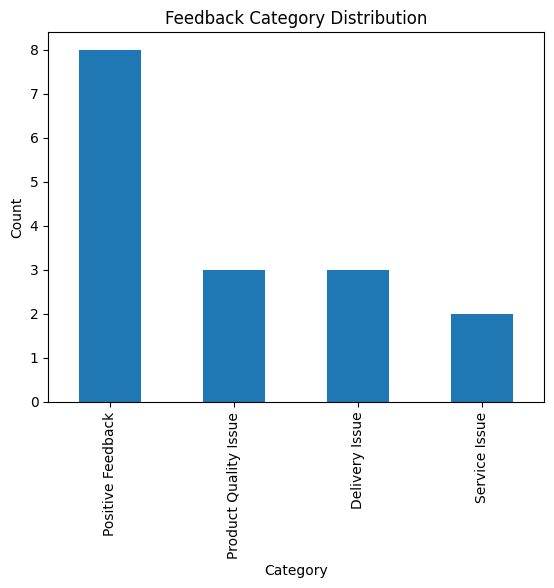

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["cleaned_review"] = df["review"].apply(clean_text)


df['category'].value_counts().plot(kind='bar')
plt.title("Feedback Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()



In [6]:
df["review_length"] = df["review"].apply(len)
df.groupby("category")["review_length"].mean()


,review_length
category,
Delivery Issue,35.333333
Positive Feedback,30.875000
Product Quality Issue,36.000000
Service Issue,38.000000


In [9]:
X = df["cleaned_review"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)



LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                       precision    recall  f1-score   support

       Delivery Issue       0.00      0.00      0.00         1
    Positive Feedback       0.25      1.00      0.40         1
Product Quality Issue       0.00      0.00      0.00         1
        Service Issue       0.00      0.00      0.00         1

             accuracy                           0.25         4
            macro avg       0.06      0.25      0.10         4
         weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:

[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]


In [12]:
new_reviews = [
    "The product stopped working after two days",
    "Delivery was very fast and smooth",
    "Customer support was very helpful",
    "I am extremely happy with this product"
]

new_cleaned = [clean_text(r) for r in new_reviews]
new_tfidf = vectorizer.transform(new_cleaned)

predictions = model.predict(new_tfidf)

for review, pred in zip(new_reviews, predictions):
    print(f"Review: {review}")
    print(f"Predicted Category: {pred}\n")


Review: The product stopped working after two days
Predicted Category: Positive Feedback

Review: Delivery was very fast and smooth
Predicted Category: Positive Feedback

Review: Customer support was very helpful
Predicted Category: Positive Feedback

Review: I am extremely happy with this product
Predicted Category: Positive Feedback



In [14]:
df.to_csv("text_classification_results.csv", index=False)
